![car](car.jpg)

Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [125]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Read in dataset
cars = pd.read_csv("car_insurance.csv")

# Check for missing values & data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [126]:
cars.head(3)

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0


In [127]:
cars.isnull().sum() / len(cars)

id                     0.0000
age                    0.0000
gender                 0.0000
driving_experience     0.0000
education              0.0000
income                 0.0000
credit_score           0.0982
vehicle_ownership      0.0000
vehicle_year           0.0000
married                0.0000
children               0.0000
postal_code            0.0000
annual_mileage         0.0957
vehicle_type           0.0000
speeding_violations    0.0000
duis                   0.0000
past_accidents         0.0000
outcome                0.0000
dtype: float64

In [128]:
cars.children.value_counts(normalize=True)

children
1.0    0.6888
0.0    0.3112
Name: proportion, dtype: float64

In [129]:
cars.postal_code.value_counts(normalize=True)

postal_code
10238    0.6940
32765    0.2456
92101    0.0484
21217    0.0120
Name: proportion, dtype: float64

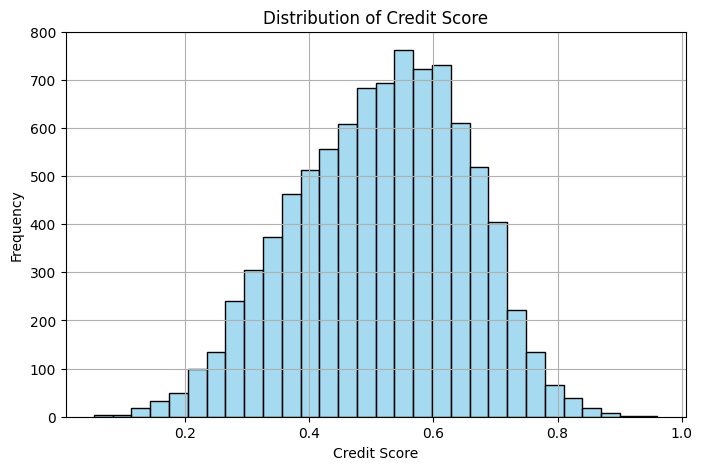

In [130]:
plt.figure(figsize=(8, 5))
sns.histplot(cars['credit_score'], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

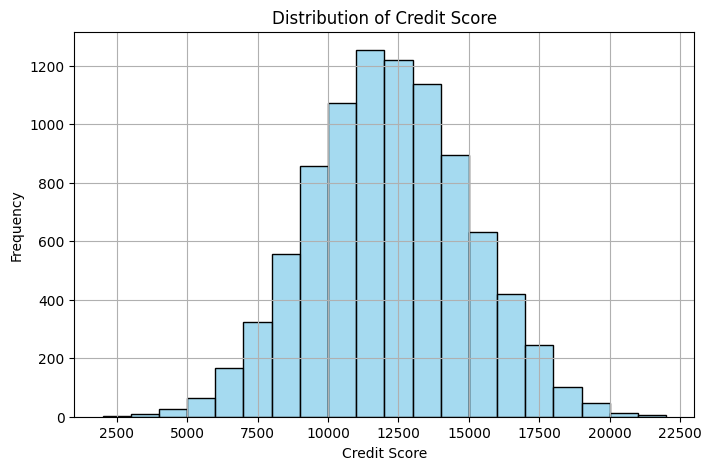

In [131]:
plt.figure(figsize=(8, 5))
sns.histplot(cars['annual_mileage'], bins=20, kde=False, color='skyblue')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [132]:
def get_summary_stas(df, columns):
    """
    Returns a DataFrame with mean, median, and mode for selected numeric columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of numeric column names to summarize.

    Returns:
        pd.DataFrame: Summary statistics (mean, median, mode).
    """
    means = df[columns].mean()
    medians = df[columns].median()
    modes = df[columns].mode().iloc[0]  # Safely take first mode if multiple exist

    summary = pd.DataFrame({
        'Mean': means,
        'Median': medians,
        'Mode': modes
    })

    return summary
get_summary_stas(cars, columns=['credit_score', 'annual_mileage'])


,Mean,Median,Mode
credit_score,0.515813,0.525033,0.053358
annual_mileage,11697.003207,12000.000000,11000.000000


For the missing column `credit_score` and `annual_mileage`, the distribution is approximately normal, or bell-shaped, but slightly right-skewed (positively skewed). This means that while most values are clustered near the center, there's a tail stretching out to the right with some higher values.

## Is the data imbalance?

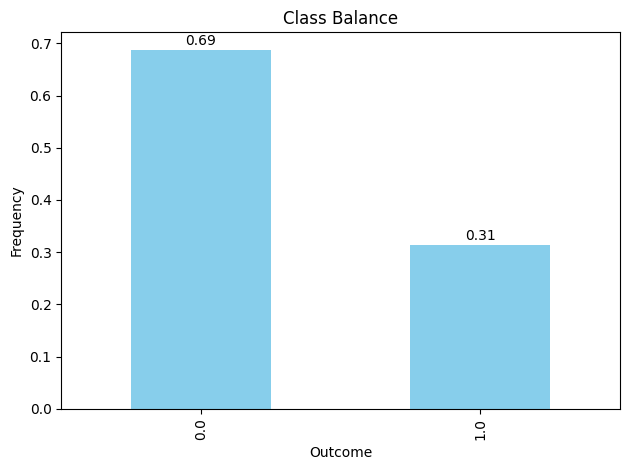

In [133]:
# Create value counts (normalized)
value_counts = cars["outcome"].value_counts(normalize=True)

# Plot bar chart
ax = value_counts.plot(
    kind="bar",
    xlabel="Outcome",
    ylabel="Frequency",
    title="Class Balance",
    color="skyblue"
)

# Add value labels on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [134]:
target = "outcome"
X = cars.drop(columns=["outcome", "id"])
y = cars[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 16)
y shape: (10000,)


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 16)
y_train shape: (8000,)
X_test shape: (2000, 16)
y_test shape: (2000,)


In [136]:
## Resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomOverSampler(random_state=42)
over_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

### Baseline Accuracy Score

How do you know whether or not the accuracy score you calculated for your model is good? A baseline accuracy score for the model can be used to compare your model accuracy results against. A common baseline is to use the percentage that the majority class shows up in the training data. This would be your accuracy if you simply predicted the majority class for all observations. If the model is not beating this baseline, that suggests that the features are not adding any valuable information to classify your observations. 

In [137]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6875


## Iterate
Now that we have a baseline, let's build a model to see if we can beat it.

In [138]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score


numeric_transformer = Pipeline([ 
    ("imputer", SimpleImputer()) 
])
categorical_transformer = Pipeline([ 
    ("onehot", OneHotEncoder(use_cat_names=True)) 
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer,     make_column_selector(dtype_include="number")),
    ("cat", categorical_transformer, make_column_selector(dtype_exclude="number")),
])


In [139]:
clf_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
params = {
    "columntransformer__num__imputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators" : range(25, 100, 25),
    "randomforestclassifier__max_depth" : range(10, 50, 10)
}
model = GridSearchCV(clf_rf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
model_rf_over = model.fit(X_train_over, y_train_over)
model_rf_under = model.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [140]:
results_rf_over = pd.DataFrame(model_rf_over.cv_results_)
results_rf_over.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__num__imputer__strategy,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.868645,0.047986,0.064445,0.012275,mean,30,50,{'columntransformer__num__imputer__strategy': ...,0.890455,0.895000,0.920455,0.931364,0.927727,0.913000,0.016982,1
10,0.853688,0.064802,0.060448,0.012019,mean,40,50,{'columntransformer__num__imputer__strategy': ...,0.890455,0.895000,0.920455,0.931364,0.927727,0.913000,0.016982,1
17,1.220578,0.023723,0.076192,0.008301,median,20,75,{'columntransformer__num__imputer__strategy': ...,0.895000,0.895000,0.915909,0.932273,0.924545,0.912545,0.015233,3
5,1.259174,0.071382,0.078324,0.005979,mean,20,75,{'columntransformer__num__imputer__strategy': ...,0.888636,0.896818,0.914545,0.931364,0.926818,0.911636,0.016593,4
16,0.898359,0.030292,0.064724,0.005284,median,20,50,{'columntransformer__num__imputer__strategy': ...,0.893182,0.896818,0.915000,0.932273,0.920909,0.911636,0.014719,4


In [141]:
# Extract best hyperparameters
print(model_rf_over.best_estimator_)
print(model_rf_over.best_params_)
print(model_rf_over.best_score_)

acc_train = model_rf_over.score(X_train, y_train)
acc_test = model_rf_over.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB974510>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(use_cat_names=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB8FE190>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=50,
                                        random_state=42))])
{'columntransformer__num__imputer__strategy'

In [142]:
results_rf_under = pd.DataFrame(model_rf_under.cv_results_)
results_rf_under.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__num__imputer__strategy,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.868645,0.047986,0.064445,0.012275,mean,30,50,{'columntransformer__num__imputer__strategy': ...,0.890455,0.895000,0.920455,0.931364,0.927727,0.913000,0.016982,1
10,0.853688,0.064802,0.060448,0.012019,mean,40,50,{'columntransformer__num__imputer__strategy': ...,0.890455,0.895000,0.920455,0.931364,0.927727,0.913000,0.016982,1
17,1.220578,0.023723,0.076192,0.008301,median,20,75,{'columntransformer__num__imputer__strategy': ...,0.895000,0.895000,0.915909,0.932273,0.924545,0.912545,0.015233,3
5,1.259174,0.071382,0.078324,0.005979,mean,20,75,{'columntransformer__num__imputer__strategy': ...,0.888636,0.896818,0.914545,0.931364,0.926818,0.911636,0.016593,4
16,0.898359,0.030292,0.064724,0.005284,median,20,50,{'columntransformer__num__imputer__strategy': ...,0.893182,0.896818,0.915000,0.932273,0.920909,0.911636,0.014719,4


In [143]:
# Extract best hyperparameters
print(model_rf_under.best_estimator_)
print(model_rf_under.best_params_)
print(model_rf_under.best_score_)

acc_train = model_rf_under.score(X_train, y_train)
acc_test = model_rf_under.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB974510>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(use_cat_names=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB8FE190>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=50,
                                        random_state=42))])
{'columntransformer__num__imputer__strategy'

In [144]:
clf_gbc = make_pipeline(preprocessor, GradientBoostingClassifier())

params = {
    "columntransformer__num__imputer__strategy": ["mean", "median"],
    "gradientboostingclassifier__max_depth": range(2,5,1),
    "gradientboostingclassifier__n_estimators": range(20,31,5)
}

model = GridSearchCV(clf_gbc, param_grid=params, cv=5, n_jobs=-1, verbose=1)
model_gbc_over = model.fit(X_train_over, y_train_over)
model_gbc_under = model.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [145]:
results_gbc_over = pd.DataFrame(model_gbc_over.cv_results_)
results_gbc_over.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__num__imputer__strategy,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.020784,0.056022,0.020307,0.001290,median,4,30,{'columntransformer__num__imputer__strategy': ...,0.838636,0.852727,0.854545,0.848182,0.847727,0.848364,0.005519,1
8,1.481858,0.085218,0.044767,0.006126,mean,4,30,{'columntransformer__num__imputer__strategy': ...,0.838182,0.849091,0.855909,0.847273,0.843636,0.846818,0.005878,2
16,1.020548,0.029391,0.024949,0.002046,median,4,25,{'columntransformer__num__imputer__strategy': ...,0.835000,0.849545,0.853636,0.846818,0.839545,0.844909,0.006757,3
7,1.249214,0.065177,0.059393,0.003774,mean,4,25,{'columntransformer__num__imputer__strategy': ...,0.836364,0.847273,0.852727,0.847727,0.840455,0.844909,0.005788,3
6,1.000784,0.100923,0.060244,0.015652,mean,4,20,{'columntransformer__num__imputer__strategy': ...,0.833636,0.849091,0.846818,0.845000,0.838636,0.842636,0.005687,5
15,1.082553,0.096877,0.036453,0.008798,median,4,20,{'columntransformer__num__imputer__strategy': ...,0.832727,0.848182,0.846818,0.844091,0.839091,0.842182,0.005658,6
5,1.201398,0.180442,0.059642,0.008585,mean,3,30,{'columntransformer__num__imputer__strategy': ...,0.825000,0.845909,0.845909,0.838636,0.837727,0.838636,0.007649,7
14,1.194352,0.128843,0.044287,0.006059,median,3,30,{'columntransformer__num__imputer__strategy': ...,0.825000,0.843182,0.845455,0.841364,0.832273,0.837455,0.007669,8
4,0.835673,0.184765,0.046970,0.020605,mean,3,25,{'columntransformer__num__imputer__strategy': ...,0.820000,0.842273,0.842273,0.837727,0.833636,0.835182,0.008245,9
13,0.931229,0.104620,0.037801,0.007502,median,3,25,{'columntransformer__num__imputer__strategy': ...,0.820000,0.843636,0.841818,0.837727,0.832273,0.835091,0.008496,10


In [146]:
# Extract best hyperparameters
print(model_gbc_over.best_estimator_)
print(model_gbc_over.best_params_)
print(model_gbc_over.best_score_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB93B3D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(use_cat_names=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FC09B190>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=30))])
{'columntransformer__num__imputer__strategy': 'median', 'gradientboostingclas

In [147]:
acc_train = model_gbc_over.score(X_train, y_train)
acc_test = model_gbc_over.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8455
Validation Accuracy: 0.844


In [148]:
results_gbc_under = pd.DataFrame(model_gbc_under.cv_results_)
results_gbc_under.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__num__imputer__strategy,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.020784,0.056022,0.020307,0.001290,median,4,30,{'columntransformer__num__imputer__strategy': ...,0.838636,0.852727,0.854545,0.848182,0.847727,0.848364,0.005519,1
8,1.481858,0.085218,0.044767,0.006126,mean,4,30,{'columntransformer__num__imputer__strategy': ...,0.838182,0.849091,0.855909,0.847273,0.843636,0.846818,0.005878,2
16,1.020548,0.029391,0.024949,0.002046,median,4,25,{'columntransformer__num__imputer__strategy': ...,0.835000,0.849545,0.853636,0.846818,0.839545,0.844909,0.006757,3
7,1.249214,0.065177,0.059393,0.003774,mean,4,25,{'columntransformer__num__imputer__strategy': ...,0.836364,0.847273,0.852727,0.847727,0.840455,0.844909,0.005788,3
6,1.000784,0.100923,0.060244,0.015652,mean,4,20,{'columntransformer__num__imputer__strategy': ...,0.833636,0.849091,0.846818,0.845000,0.838636,0.842636,0.005687,5
15,1.082553,0.096877,0.036453,0.008798,median,4,20,{'columntransformer__num__imputer__strategy': ...,0.832727,0.848182,0.846818,0.844091,0.839091,0.842182,0.005658,6
5,1.201398,0.180442,0.059642,0.008585,mean,3,30,{'columntransformer__num__imputer__strategy': ...,0.825000,0.845909,0.845909,0.838636,0.837727,0.838636,0.007649,7
14,1.194352,0.128843,0.044287,0.006059,median,3,30,{'columntransformer__num__imputer__strategy': ...,0.825000,0.843182,0.845455,0.841364,0.832273,0.837455,0.007669,8
4,0.835673,0.184765,0.046970,0.020605,mean,3,25,{'columntransformer__num__imputer__strategy': ...,0.820000,0.842273,0.842273,0.837727,0.833636,0.835182,0.008245,9
13,0.931229,0.104620,0.037801,0.007502,median,3,25,{'columntransformer__num__imputer__strategy': ...,0.820000,0.843636,0.841818,0.837727,0.832273,0.835091,0.008496,10


In [149]:
# Extract best hyperparameters
print(model_gbc_under.best_estimator_)
print(model_gbc_under.best_params_)
print(model_gbc_under.best_score_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FB93B3D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(use_cat_names=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260FC09B190>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=30))])
{'columntransformer__num__imputer__strategy': 'median', 'gradientboostingclas

In [150]:
acc_train = model_gbc_under.score(X_train, y_train)
acc_test = model_gbc_under.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8455
Validation Accuracy: 0.844


In [151]:
# # Plot confusion matrix
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [152]:
# Print classification report
print(classification_report(y_test, model_gbc_under.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      1367
         1.0       0.71      0.84      0.77       633

    accuracy                           0.84      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.86      0.84      0.85      2000



In [153]:
print(classification_report(y_test, model_gbc_over.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      1367
         1.0       0.71      0.84      0.77       633

    accuracy                           0.84      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.86      0.84      0.85      2000



In [154]:
y_scores_gbc_under = model_gbc_under.predict_proba(X_test)[:, 1]
y_scores_gbc_over = model_gbc_over.predict_proba(X_test)[:, 1]
# 4. Compute ROC AUC
auc_gbc_under = roc_auc_score(y_test, y_scores_gbc_under)
auc_gbc_over = roc_auc_score(y_test, y_scores_gbc_over)

print(f"model_gbc_under : ROC AUC : {auc_gbc_under:.3f}")
print(f"model_gbc_over : ROC AUC : {auc_gbc_over:.3f}")

model_gbc_under : ROC AUC : 0.921
model_gbc_over : ROC AUC : 0.921


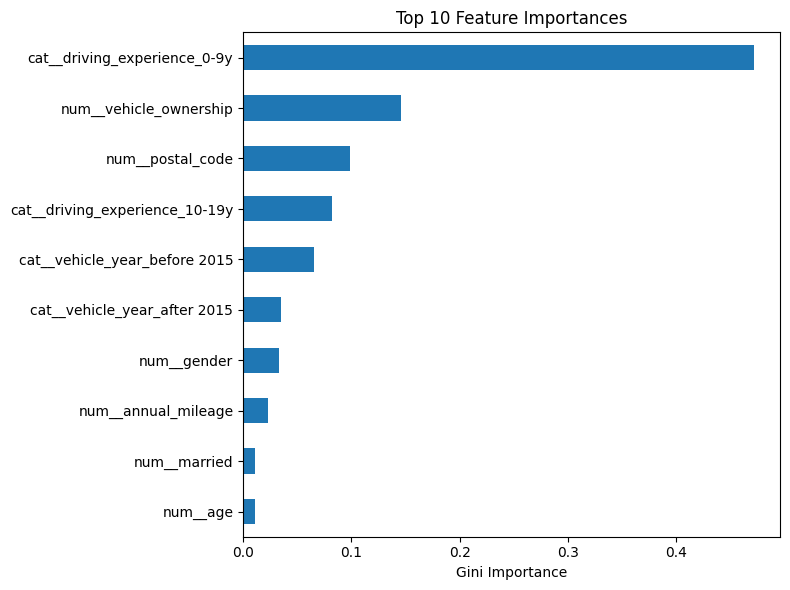

In [158]:
# 1) Grab your best pipeline
pipe = model_gbc_under.best_estimator_

# 2) Extract the fitted ColumnTransformer
ct: ColumnTransformer = pipe.named_steps["columntransformer"]

# 3) Get the names of all transformed features
#    scikit-learn ≥1.0:
feature_names = ct.get_feature_names_out()
#    (If you have an older version, see note below.)

# 4) Pull out your importances from the RF step
rf = pipe.named_steps["gradientboostingclassifier"]
importances = rf.feature_importances_

# 5) Build your Series and plot
feat_imp = pd.Series(importances, index=feature_names).sort_values()
plt.figure(figsize=(8, 6))
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

Based on those numbers, your Gradient Boosting model is the stronger choice:

Generalization

Random Forest: 87.06 % train → 82.6 % val (Δ ≈ 4.5 % drop)

Gradient Boosting: 84.51 % train → 84.1 % val (Δ ≈ 0.4 % drop)
The much smaller train–val gap for GBM tells you it’s overfitting far less and generalizes better.

Absolute Validation Performance

RF val acc: 0.826

GBM val acc: 0.841
GBM not only generalizes better but also achieves higher raw accuracy on your hold-out set.

